# Klasifikasi ECOLI ADASYN

In [ ]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
  host='127.0.0.1',
  user='root',
  password='',
  database='ecoli'
)

df = pd.read_sql("SELECT * FROM ecoli", conn)
print("\nIsi tabel ecoli:")
print(df)


Isi tabel ecoli:
      id protein_name   mcg   gvh   lip  chg   aac  alm1  alm2  \
0      1    AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   
1      2   ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   
2      3   ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   
3      4   ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   
4      5    ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   
..   ...          ...   ...   ...   ...  ...   ...   ...   ...   
331  332   TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30   
332  333   UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32   
333  334   USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38   
334  335   XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37   
335  336   YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52   

    localization_class  
0                   cp  
1                   cp  
2                   cp  
3                   cp  
4                   cp  
..                 ...  
331           

C:\Users\Syafiq Azizi\AppData\Local\Temp\ipykernel_10448\2977041872.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM ecoli", conn)


Jumlah pada tiap kelas di kolom localization_class:
localization_class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64


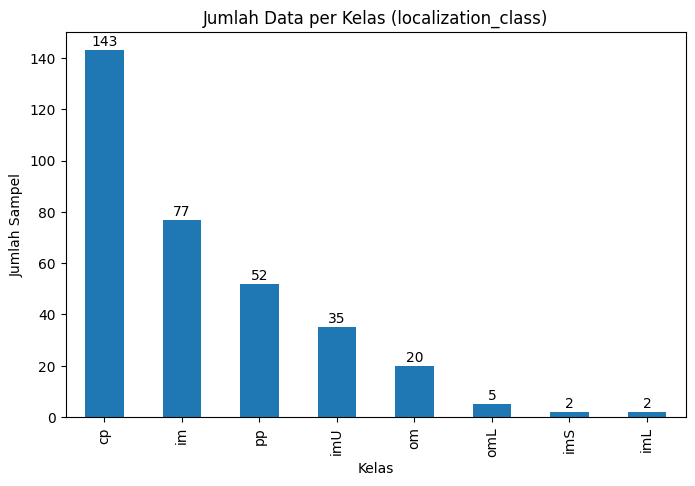

In [ ]:
species_counts = df['localization_class'].value_counts()

print("Jumlah pada tiap kelas di kolom localization_class:")
print(species_counts)

plt.figure(figsize=(8,5))
species_counts.plot(kind='bar')

plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.title("Jumlah Data per Kelas (localization_class)")

for i, v in enumerate(species_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 143, 1: 77, 2: 2, 3: 2, 4: 35, 5: 20, 6: 5, 7: 52}


In [ ]:
import pandas as pd

df = pd.DataFrame(X)
df['label'] = y

min_samples = 5

valid_classes = df['label'].value_counts()[df['label'].value_counts() >= min_samples].index

df_filtered = df[df['label'].isin(valid_classes)]

X_filtered = df_filtered.drop('label', axis=1).values
y_filtered = df_filtered['label'].values

print("Distribusi kelas setelah drop:", dict(zip(*np.unique(y_filtered, return_counts=True))))

Distribusi kelas setelah drop: {0: 143, 1: 77, 4: 35, 5: 20, 6: 5, 7: 52}


Distribusi sebelum ADASYN (y_train): {0: 114, 1: 61, 4: 28, 5: 16, 6: 4, 7: 42}
Distribusi setelah ADASYN (y_train_res): {0: 114, 1: 113, 4: 115, 5: 114, 6: 114, 7: 114}


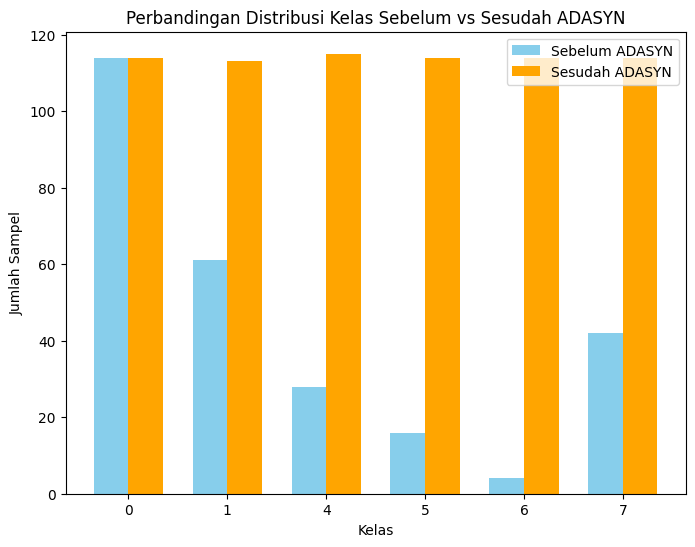

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", message=".*LOKY_MAX_CPU_COUNT.*")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Distribusi sebelum ADASYN
unique_before, counts_before = np.unique(y_train, return_counts=True)
print("Distribusi sebelum ADASYN (y_train):", dict(zip(unique_before, counts_before)))

# Terapkan ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=3)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Distribusi setelah ADASYN
unique_after, counts_after = np.unique(y_train_res, return_counts=True)
print("Distribusi setelah ADASYN (y_train_res):", dict(zip(unique_after, counts_after)))

# === Visualisasi distribusi kelas dalam satu diagram ===
x = np.arange(len(unique_before))  # posisi kelas
width = 0.35  # lebar batang

plt.figure(figsize=(8,6))
plt.bar(x - width/2, counts_before, width, label="Sebelum ADASYN", color="skyblue")
plt.bar(x + width/2, counts_after, width, label="Sesudah ADASYN", color="orange")

plt.xticks(x, unique_before)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.title("Perbandingan Distribusi Kelas Sebelum vs Sesudah ADASYN")
plt.legend()
plt.show()


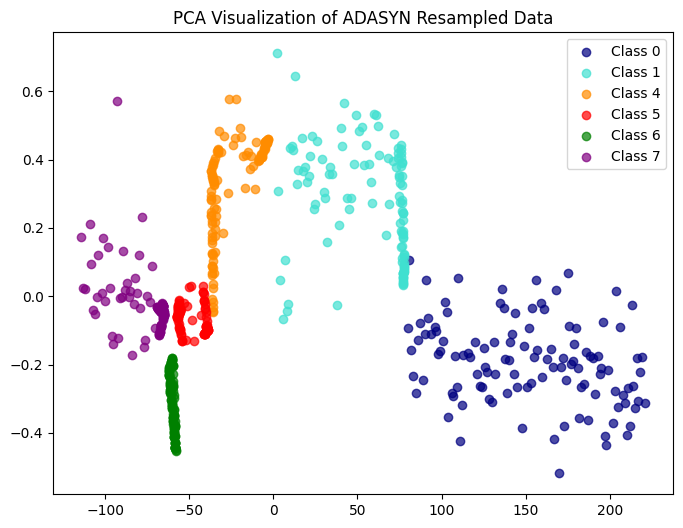

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pastikan X_train_res, y_train_res sudah ada
pca = PCA(n_components=2)
X_train_res_pca = pca.fit_transform(X_train_res)

plt.figure(figsize=(8,6))
colors = ["navy", "turquoise", "darkorange", "red", "green", "purple", "brown", "pink"]

for idx, class_label in enumerate(set(y_train_res)):
    plt.scatter(
        X_train_res_pca[y_train_res == class_label, 0],
        X_train_res_pca[y_train_res == class_label, 1],
        alpha=0.7,
        c=colors[idx % len(colors)],
        label=f"Class {class_label}"
    )

plt.title("PCA Visualization of ADASYN Resampled Data")
plt.legend()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Cross-validation ===
nb = GaussianNB()
scores_nb = cross_val_score(nb, X, y, cv=5)


# === Evaluasi di test set ===
nb.fit(X_train_res, y_train_res)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print("Accuracy:", np.mean(scores_nb))


Naive Bayes
Accuracy: 0.9607869742198101


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# === Cross-validation ===
rf = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(rf, X, y, cv=5)


# === Evaluasi di test set ===
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", np.mean(scores_rf))

Random Forest
Accuracy: 0.9608322026232473


In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state=42)
scores_bag = cross_val_score(bag, X, y, cv=5)

bag.fit(X_train_res, y_train_res)
y_pred_bag = bag.predict(X_test)

print("Bagging Classifier")
print("Accuracy:", np.mean(scores_bag))


Bagging Classifier
Accuracy: 0.8766169154228856


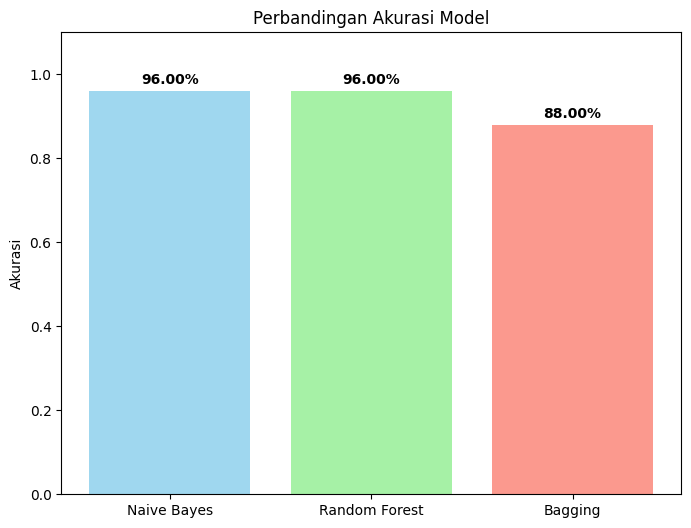

In [ ]:
akurasi = {
    "Naive Bayes": 0.96,
    "Random Forest": 0.96,
    "Bagging": 0.88
}

labels = list(akurasi.keys())
values = list(akurasi.values())

plt.figure(figsize=(8,6))
bars = plt.bar(labels, values, color=['skyblue','lightgreen','salmon'], alpha=0.8)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val*100:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model")
plt.show()
